In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本4个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1],[0,0],[1,1],[2,2]], cluster_std=[0.4,0.2,0.2,0.2], random_state=666)

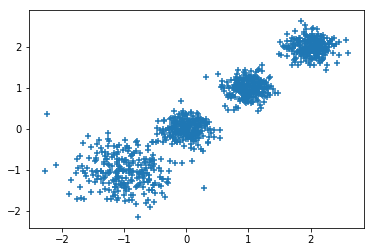

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='+')
plt.show()

In [4]:
from sklearn.cluster import KMeans
# KMeans的主要参数
# n_cluster：我们所要确定的k值
# max_iter：最大的迭代次数。当数据集为凸集时，可以不管这个数。当数据集不是凸的时候，可以通过这个参数退出循环
# n_init：用不同的初始化质心来运行算法的次数。k-means是受初始值影响的局部最优迭代算法，所以多运行几次，可以达到较好的聚类效果。默认为10
# init：初始值的选择方式，可以用完全随机选择'random',优化过的'k-means++'或者自己指定初始化的k个质心。默认的'k-means++'
# algorithm：有“auto”, “full” or “elkan”三种选择。"full"就是我们传统的K-Means算法， “elkan”是我们原理篇讲的elkan K-Means算法。默认的"auto"则会根据数据值是否是稀疏的，来决定如何选择"full"和“elkan”。一般数据是稠密的，那么就是 “elkan”，否则就是"full"。一般来说建议直接用默认的"auto"

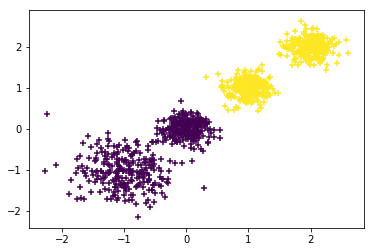

In [5]:
# 设置k为2
y_pred = KMeans(n_clusters=2, random_state=666).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='+')
plt.show()

In [6]:
# k等于2时的Calinski-Harabasz Index系数
from sklearn import metrics
metrics.calinski_harabaz_score(X, y_pred)

3088.084577541466

In [7]:
# k等于3时的Calinski-Harabasz Index系数
y_pred = KMeans(n_clusters=3, random_state=666).fit_predict(X)
metrics.calinski_harabaz_score(X, y_pred)

2963.0232832196702

In [8]:
# k等于4时的Calinski-Harabasz Index系数
y_pred = KMeans(n_clusters=4, random_state=666).fit_predict(X)
metrics.calinski_harabaz_score(X, y_pred)

6154.881371748304

##### 明显的当k=4时得到的Calinski-Harabasz Index系数是最大的

#### MiniBatchKMeans

In [9]:
from sklearn.cluster import MiniBatchKMeans
# MiniBatchKMeans的主要参数
# n_clusters：k值
# max_iter：最大迭代次数
# n_init：不同的初始化质心运行算法的次数。这里和KMeans类意义稍有不同，KMeans类里的n_init是用同样的训练集数据来跑不同的初始化质心从而运行算法。而MiniBatchKMeans类的n_init则是每次用不一样的采样数据集来跑不同的初始化质心运行算法
# init：初始值的选择方式。默认是KMeans++
# batch_size：用来跑Mini Batch KMeans算法的采样集的大小。默认是100。如果发现数据集的类别较多或者噪音点较多，需要增加这个值以达到较好的聚类效果
# init_size：用来做质心初始值候选的样本个数，默认是batch_size的3倍，一般用默认值就可以了
# reassignment_ratio： 某个类别质心被重新赋值的最大次数比例，这个和max_iter一样是为了控制算法运行时间的。这个比例是占样本总数的比例，乘以样本总数就得到了每个类别质心可以重新赋值的次数。如果取值较高的话算法收敛时间可能会增加，尤其是那些暂时拥有样本数较少的质心。默认是0.01。如果数据量不是超大的话，比如1w以下，建议使用默认值。如果数据量超过1w，类别又比较多，可能需要适当减少这个比例值。具体要根据训练集来决定。
# max_no_improvement：即连续多少个Mini Batch没有改善聚类效果的话，就停止算法， 和reassignment_ratio， max_iter一样是为了控制算法运行时间的。默认是10.一般用默认值就足够了。

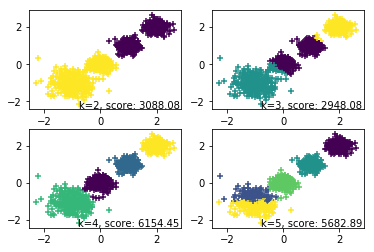

In [11]:
for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200, random_state=666).fit_predict(X)
    score= metrics.calinski_harabaz_score(X, y_pred)  
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='+')
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),transform=plt.gca().transAxes, size=10, horizontalalignment='right')
plt.show()

#### k值得评估标准

In [ ]:
# 轮廓系数Silhouette Coefficient和Calinski-Harabasz Index
# Calinski-Harabasz Index越大则聚类效果越好